## Week 2_Day 11: Random Forest

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

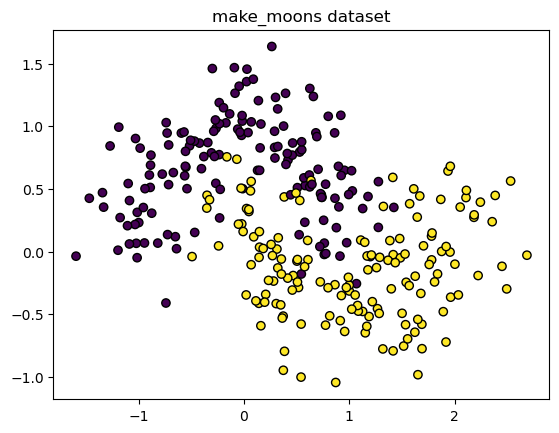

In [15]:
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.title("make_moons dataset")
plt.show()


In [6]:
#helper function for plotting boundary line
def plot_decision_boundary(model, X, y, title=None, h=0.02):
    X = np.asarray(X)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    if title:
        plt.title(title)
    plt.show()

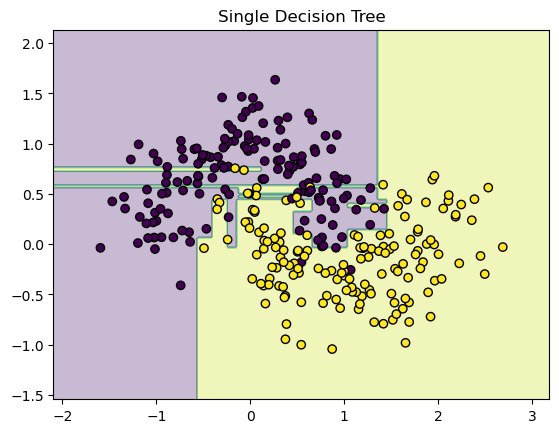

In [8]:
# baseline single decision tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

plot_decision_boundary(tree_clf, X, y, title="Single Decision Tree")

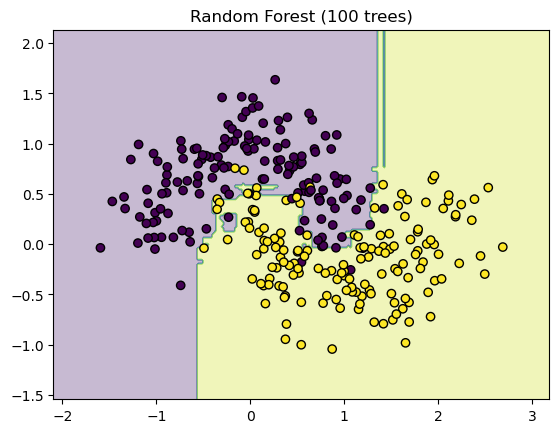

In [9]:
forest_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
forest_clf.fit(X, y)

plot_decision_boundary(forest_clf, X, y, title="Random Forest (100 trees)")

### Random Forest on Real Database - Breast Cancer

In [10]:
# load and split dataset 
cancer = load_breast_cancer(as_frame=True)
df_c = cancer.frame

X = df_c.drop(columns=["target"])
y = df_c["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Random Forest accuracy: 0.956140350877193


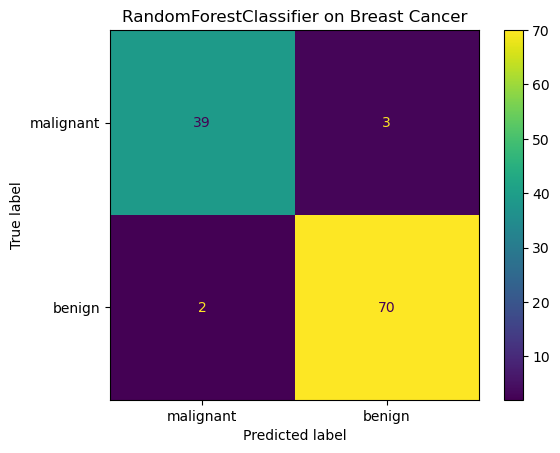

In [11]:
# baseline random forest on breast cancer dataset
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Random Forest accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot()
plt.title("RandomForestClassifier on Breast Cancer")
plt.show()

In [12]:
# quick hyperparameter experiment
settings = [
    {"n_estimators": 50, "max_depth": None},
    {"n_estimators": 100, "max_depth": None},
    {"n_estimators": 200, "max_depth": None},
    {"n_estimators": 100, "max_depth": 5},
    {"n_estimators": 100, "max_depth": 10},
]

for s in settings:
    rf = RandomForestClassifier(
        n_estimators=s["n_estimators"],
        max_depth=s["max_depth"],
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators={s['n_estimators']:3}, max_depth={str(s['max_depth']):>4} -> accuracy={acc:.4f}")

n_estimators= 50, max_depth=None -> accuracy=0.9561
n_estimators=100, max_depth=None -> accuracy=0.9561
n_estimators=200, max_depth=None -> accuracy=0.9561
n_estimators=100, max_depth=   5 -> accuracy=0.9561
n_estimators=100, max_depth=  10 -> accuracy=0.9561


Feature Importance

In [13]:
importances = rf_clf.feature_importances_
feature_names = X.columns

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
forest_importances.head(10)

worst area              0.140016
worst concave points    0.129530
worst radius            0.097696
mean concave points     0.090885
worst perimeter         0.072226
mean perimeter          0.069574
mean radius             0.068676
mean concavity          0.057638
mean area               0.049172
worst concavity         0.034340
dtype: float64

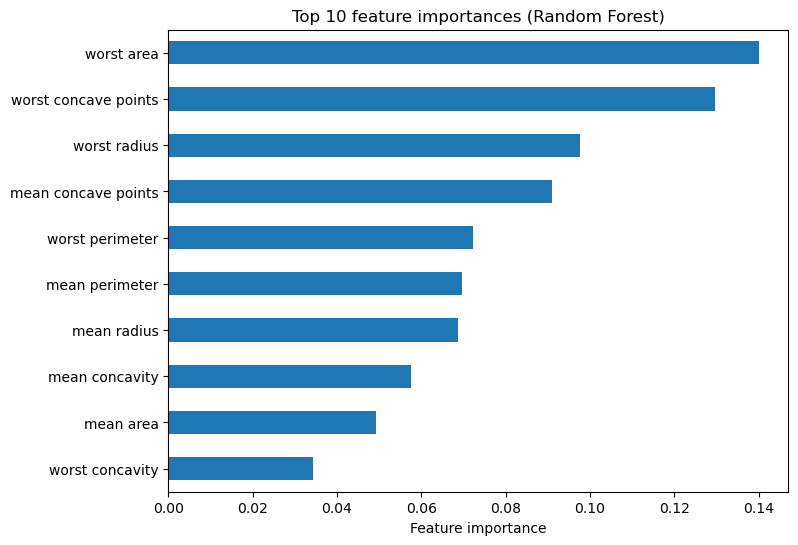

In [14]:
plt.figure(figsize=(8, 6))
forest_importances.head(10).plot(kind="barh")
plt.gca().invert_yaxis()
plt.xlabel("Feature importance")
plt.title("Top 10 feature importances (Random Forest)")
plt.show()

### ✅ Day 5 Recap – Random Forests (Short Answers)

### 1. What is bagging and why does it help?

Bagging means training many models on different random samples of the data and averaging their predictions.
It helps because each model makes different mistakes, and averaging reduces overfitting and gives more stable results.

### 2. How is a Random Forest different from a single Decision Tree?

A single tree can overfit easily.
A Random Forest builds many trees on slightly different data and random subsets of features, then combines them.
This makes the final prediction more accurate and less noisy.

### 3. What do n_estimators and max_depth control?

n_estimators: the number of trees in the forest. More trees → more stable but slower.

max_depth: how deep each tree is allowed to grow. Shallow trees generalize better; deep trees overfit.

### 4. When would I choose a Random Forest over other models?

Over a single tree: when I want better accuracy and less overfitting.

Over linear/logistic regression: when the data is not linear and needs more flexible decision boundaries.

Over KNN: when I want better performance on large datasets and don’t want to worry about scaling.

Over SVM: when dealing with many features, mixed feature types, or when I want a model that works well with almost no tuning.

### 5. What did I see in feature importances for the breast-cancer dataset?

Some features (like mean radius, texture, perimeter, area, etc.) had much higher importance scores, meaning the forest relied on them more to make decisions.
Less important features contributed little to the final prediction.